## 데이터 불러오기

In [51]:
import pandas as pd

total_cm = pd.read_csv('./youtube_total_comments.csv',encoding='cp949',index_col=0)

In [52]:
total_cm.head()

,댓글내용,긍/부정
0,광고맛집 여기어때 해외여행 혜택어때 해외여행 최저가 챌린지 http://bit.l...,1
1,오사카 어때~,1
2,진짜 한파트 한파트가 다 살아있다ㅋㅋㅋㅋ 다들 너무 친근하고 재밌고ㅠㅠㅠ 그 와중에...,1
3,여행자로 파트리샤 섭외한게 신의 한 수다,1
4,zb1 석매튜 때문에 여기어때 광고 처음 봤는데 광고 넘 좋은데요? 진짜 각 나라랑...,1


In [53]:
total_cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1954 entries, 0 to 1953
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   댓글내용    1943 non-null   object
 1   긍/부정    1954 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 45.8+ KB


In [54]:
# 결측치제거
print(total_cm.isna().sum())
total_cm.dropna(axis=0,inplace=True)
print(len(total_cm))

댓글내용    11
긍/부정     0
dtype: int64
1943


## 형태소 분석

In [55]:
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [56]:
# 예시 출력해보기
result = kiwi.analyze(total_cm['댓글내용'])

a=0

try:
    for idx,x in enumerate(result):
        print(x)
        a=idx
        print(a)
except:
    pass

[([Token(form='광고', tag='NNG', start=0, len=2), Token(form='맛집', tag='NNG', start=2, len=2), Token(form='여기', tag='NP', start=5, len=2), Token(form='어떻', tag='VA', start=7, len=2), Token(form='어', tag='EF', start=8, len=1), Token(form='해외여행', tag='NNG', start=10, len=4), Token(form='혜택', tag='NNG', start=15, len=2), Token(form='어떻', tag='VA', start=17, len=2), Token(form='어', tag='EC', start=18, len=1), Token(form='해외여행', tag='NNG', start=21, len=4), Token(form='최저', tag='NNG', start=26, len=2), Token(form='가', tag='XSN', start=28, len=1), Token(form='챌린지', tag='NNG', start=30, len=3), Token(form='http://bit.ly/3hgIPeR', tag='W_URL', start=34, len=21)], -155.3460693359375)]
0
[([Token(form='오사카', tag='NNP', start=0, len=3), Token(form='어떻', tag='VA', start=4, len=2), Token(form='어', tag='EF', start=5, len=1), Token(form='~', tag='SO', start=6, len=1)], -36.823055267333984)]
1
[([Token(form='진짜', tag='MAG', start=0, len=2), Token(form='한', tag='MM', start=3, len=1), Token(form='파트', tag

In [57]:
# 동사와 명사만 추출하는 함수 정의하기

def extract_keywords(text):
    result = kiwi.analyze(text)
    for token,pos,_,_ in result[0][0]:
        if pos[0] in 'NV':
            yield f'{token}/{pos}'

## 문서 단어행렬 (DTM만들기)

In [84]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

# 단어토큰 피처는 최대 800개로 제한
cv = CountVectorizer(max_features=800, tokenizer= extract_keywords)
dtm = cv.fit_transform(total_cm['댓글내용'])
dtm

c:\Users\dldkr\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


<1943x800 sparse matrix of type '<class 'numpy.int64'>'
	with 11055 stored elements in Compressed Sparse Row format>

In [85]:
# 가중치 적용(TF-IDF 변환)
trans = TfidfTransformer()
dtm2 = trans.fit_transform(dtm)

In [86]:
# 피처 저장
words = cv.get_feature_names_out()
print(words,len(words),sep='\n')

['가/VV' '가/VX' '가난/NNG' '가능/NNG' '가방/NNG' '가슴/NNG' '가입/NNG' '가족/NNG'
 '가족부/NNG' '가지/VV' '가치/NNG' '갈등/NNG' '감사/NNG' '강아지/NNG' '강제/NNG' '강주은/NNP'
 '갖/VV' '같/VA' '갚/VV' '개/NNB' '개/NNG' '개/VV' '개그/NNG' '개그맨/NNG' '개빡/NNG'
 '개웃기네/NNP' '개인/NNG' '거/NNB' '거리/NNG' '거지/NNG' '걱정/NNG' '걸/VV' '걸리/VV'
 '검/NNG' '검색/NNG' '것/NNB' '게임/NNG' '겨울/NNG' '결혼/NNG' '경우/NNG' '경쟁/NNG'
 '경찰/NNG' '계시/VV' '계획/NNG' '곡/NNG' '공익/NNG' '공중파/NNG' '과/NNG' '과거/NNG'
 '과장/NNG' '관계/NNG' '관심/NNG' '광고/NNG' '광고주/NNG' '괜찮/VA' '구도/NNG' '국가/NNG'
 '국민/NNG' '국적/NNG' '군/NNB' '군/NNG' '군대/NNG' '군인/NNG' '궁금하/VA' '귀여워/NNP'
 '귀엽/VA-I' '그/NP' '그거/NP' '그것/NP' '그때/NNG' '그러/VV' '그렇/VA' '그렉/NNP'
 '그룹/NNG' '극혐/NNG' '금/NNG' '금리/NNG' '금융/NNG' '급/NNG' '기/NNG' '기계/NNG'
 '기다리/VV' '기대/NNG' '기본/NNG' '기분/NNG' '기억/NNG' '기업/NNG' '기적/NNG' '기하/NNG'
 '기획/NNG' '길/NNG' '길/VA' '김민/NNP' '김치/NNG' '까/VV' '깔/VV' '꺼/NNB' '끝/NNG'
 '끼/VV' '끼치/VV' '나/NP' '나/VV' '나/VX' '나가/VV' '나단/NNP' '나라/NNG' '나쁘/VA'
 '나오/VV' '나이/NNG' '나중/NNG' '난리/NNG' '날/NNG' '남/NNG' '남/VV' '남기/VV'
 '남

## 저장

In [87]:
import joblib
joblib.dump({'words': words, 'dtm': dtm},'com_comment.pkl')

['com_comment.pkl']

## 학습

In [88]:
import joblib

data = joblib.load('com_comment.pkl')

In [89]:
data['words']

array(['가/VV', '가/VX', '가난/NNG', '가능/NNG', '가방/NNG', '가슴/NNG', '가입/NNG',
       '가족/NNG', '가족부/NNG', '가지/VV', '가치/NNG', '갈등/NNG', '감사/NNG',
       '강아지/NNG', '강제/NNG', '강주은/NNP', '갖/VV', '같/VA', '갚/VV', '개/NNB',
       '개/NNG', '개/VV', '개그/NNG', '개그맨/NNG', '개빡/NNG', '개웃기네/NNP',
       '개인/NNG', '거/NNB', '거리/NNG', '거지/NNG', '걱정/NNG', '걸/VV', '걸리/VV',
       '검/NNG', '검색/NNG', '것/NNB', '게임/NNG', '겨울/NNG', '결혼/NNG', '경우/NNG',
       '경쟁/NNG', '경찰/NNG', '계시/VV', '계획/NNG', '곡/NNG', '공익/NNG',
       '공중파/NNG', '과/NNG', '과거/NNG', '과장/NNG', '관계/NNG', '관심/NNG',
       '광고/NNG', '광고주/NNG', '괜찮/VA', '구도/NNG', '국가/NNG', '국민/NNG',
       '국적/NNG', '군/NNB', '군/NNG', '군대/NNG', '군인/NNG', '궁금하/VA',
       '귀여워/NNP', '귀엽/VA-I', '그/NP', '그거/NP', '그것/NP', '그때/NNG', '그러/VV',
       '그렇/VA', '그렉/NNP', '그룹/NNG', '극혐/NNG', '금/NNG', '금리/NNG', '금융/NNG',
       '급/NNG', '기/NNG', '기계/NNG', '기다리/VV', '기대/NNG', '기본/NNG', '기분/NNG',
       '기억/NNG', '기업/NNG', '기적/NNG', '기하/NNG', '기획/NNG', '길/NNG', '길/VA',
       '김민/

## 데이터 분할 

In [90]:
dtm

<1943x800 sparse matrix of type '<class 'numpy.int64'>'
	with 11055 stored elements in Compressed Sparse Row format>

In [91]:
print(dtm)

  (0, 52)	1
  (0, 475)	1
  (0, 457)	2
  (0, 782)	2
  (0, 707)	1
  (1, 457)	1
  (1, 502)	1
  (2, 750)	2
  (2, 372)	1
  (2, 591)	1
  (2, 153)	1
  (2, 610)	1
  (2, 507)	1
  (2, 217)	1
  (2, 340)	1
  (2, 287)	1
  (2, 549)	1
  (2, 562)	1
  (2, 522)	1
  (2, 186)	1
  (2, 322)	1
  (2, 733)	1
  (2, 253)	1
  (3, 549)	1
  (3, 751)	1
  :	:
  (1938, 769)	1
  (1938, 115)	1
  (1938, 481)	1
  (1938, 61)	1
  (1938, 544)	1
  (1939, 52)	2
  (1939, 549)	2
  (1939, 770)	1
  (1939, 101)	1
  (1939, 117)	1
  (1939, 62)	1
  (1939, 795)	1
  (1939, 80)	1
  (1939, 270)	1
  (1941, 360)	1
  (1941, 190)	1
  (1941, 471)	1
  (1941, 273)	1
  (1941, 345)	1
  (1942, 549)	1
  (1942, 436)	1
  (1942, 625)	1
  (1942, 325)	1
  (1942, 345)	1
  (1942, 479)	2


In [92]:
from sklearn.model_selection import train_test_split

x = dtm
y = total_cm['긍/부정']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 1984)

## 로지스틱 회귀분석

In [67]:
import tensorflow as tf 

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(x_train.A, y_train, epochs=3)

Epoch 1/3
49/49 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6995
Epoch 2/3
49/49 [==============================] - 0s 1ms/step - loss: 0.6339 - accuracy: 0.8089
Epoch 3/3
49/49 [==============================] - 0s 1ms/step - loss: 0.6021 - accuracy: 0.8443


In [68]:
model.evaluate(x_test.A, y_test)

13/13 [==============================] - 0s 1ms/step - loss: 0.5916 - accuracy: 0.8021


[0.5916178226470947, 0.8020565509796143]

In [93]:
# 모델 저장
model.save('C:/project/com_comment.krs')

INFO:tensorflow:Assets written to: C:/project/com_comment.krs\assets


INFO:tensorflow:Assets written to: C:/project/com_comment.krs\assets


## 가중치 분석

In [70]:
import tensorflow as tf
model = tf.keras.models.load_model('C:/project/com_comment.krs/')

In [71]:
w,b = model.weights

In [72]:
w

<tf.Variable 'dense_2/kernel:0' shape=(800, 1) dtype=float32, numpy=
array([[ 2.78678909e-02],
       [ 1.81588456e-02],
       [ 1.48134874e-02],
       [-2.21141353e-02],
       [-1.07680671e-01],
       [ 7.91860558e-03],
       [-5.18125184e-02],
       [-3.49850431e-02],
       [ 1.32059827e-02],
       [-1.02429651e-01],
       [ 2.23516338e-02],
       [-9.31819677e-02],
       [ 1.78909060e-02],
       [-4.20593806e-02],
       [-8.20737183e-02],
       [ 5.87526485e-02],
       [-1.23092458e-02],
       [ 5.30131743e-04],
       [-1.21958859e-01],
       [ 1.30344545e-02],
       [ 6.82162866e-02],
       [-9.46302116e-02],
       [-2.13363376e-02],
       [ 7.44156837e-02],
       [ 2.17619957e-03],
       [ 7.84057304e-02],
       [ 4.61960025e-02],
       [-7.02692643e-02],
       [-5.94767705e-02],
       [-8.59011486e-02],
       [-6.30903766e-02],
       [-6.07543066e-02],
       [ 6.18922487e-02],
       [-9.56221670e-02],
       [ 2.92187184e-02],
       [-1.14778848e-

* 단어별 가중치표

In [73]:
w.numpy()

array([[ 2.78678909e-02],
       [ 1.81588456e-02],
       [ 1.48134874e-02],
       [-2.21141353e-02],
       [-1.07680671e-01],
       [ 7.91860558e-03],
       [-5.18125184e-02],
       [-3.49850431e-02],
       [ 1.32059827e-02],
       [-1.02429651e-01],
       [ 2.23516338e-02],
       [-9.31819677e-02],
       [ 1.78909060e-02],
       [-4.20593806e-02],
       [-8.20737183e-02],
       [ 5.87526485e-02],
       [-1.23092458e-02],
       [ 5.30131743e-04],
       [-1.21958859e-01],
       [ 1.30344545e-02],
       [ 6.82162866e-02],
       [-9.46302116e-02],
       [-2.13363376e-02],
       [ 7.44156837e-02],
       [ 2.17619957e-03],
       [ 7.84057304e-02],
       [ 4.61960025e-02],
       [-7.02692643e-02],
       [-5.94767705e-02],
       [-8.59011486e-02],
       [-6.30903766e-02],
       [-6.07543066e-02],
       [ 6.18922487e-02],
       [-9.56221670e-02],
       [ 2.92187184e-02],
       [-1.14778848e-02],
       [ 2.63566691e-02],
       [ 3.30396146e-02],
       [-8.1

In [74]:
import pandas as pd

word_sent = pd.DataFrame({'토큰':words, '가중치': w.numpy().flat})
word_sent

,토큰,가중치
0,가/VV,0.027868
1,가/VX,0.018159
2,가난/NNG,0.014813
3,가능/NNG,-0.022114
4,가방/NNG,-0.107681
...,...,...
795,화/NNG,-0.091835
796,회사/NNG,-0.109714
797,후/NNG,0.047227
798,흥얼거리/VV,-0.090135


* 부정단어

In [75]:
word_sent.sort_values('가중치').head(20)

,토큰,가중치
117,남자/NNG,-0.178196
87,기적/NNG,-0.144575
76,금리/NNG,-0.142073
657,지금/NNG,-0.141009
785,현실/NNG,-0.139750
791,호구/NNG,-0.134950
514,용/NNG,-0.134249
372,살/VV,-0.129017
169,대부업/NNG,-0.127022
378,생각/NNG,-0.122909


* 긍정단어

In [76]:
word_sent.sort_values('가중치',ascending=False).head(30)

,토큰,가중치
475,여기/NP,0.182634
340,부장/NNG,0.154823
277,민/NNP,0.153839
562,이용진/NNP,0.145616
246,맨/NNG,0.140798
692,처음/NNG,0.134389
502,오사카/NNP,0.134294
541,음색/NNG,0.134207
266,목소리/NNG,0.133796
290,반갑/VA-I,0.128631


## Early stopping

In [77]:
from sklearn.model_selection import train_test_split

x = dtm
y = total_cm['긍/부정']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 1984)

In [78]:
import tensorflow as tf  

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train.A, y_train, epochs=100, validation_split= 0.1)

Epoch 1/100
44/44 [==============================] - 1s 5ms/step - loss: 0.6710 - accuracy: 0.6753 - val_loss: 0.6469 - val_accuracy: 0.7885
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6376 - accuracy: 0.8097 - val_loss: 0.6215 - val_accuracy: 0.8269
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.6086 - accuracy: 0.8498 - val_loss: 0.5985 - val_accuracy: 0.8526
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5822 - accuracy: 0.8677 - val_loss: 0.5779 - val_accuracy: 0.8462
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.8841 - val_loss: 0.5596 - val_accuracy: 0.8462
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5374 - accuracy: 0.8898 - val_loss: 0.5431 - val_accuracy: 0.8397
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5179 - accuracy: 0.8927 - val_loss: 0.5279 - val_accuracy: 0.8397
Epoch 8/100
4

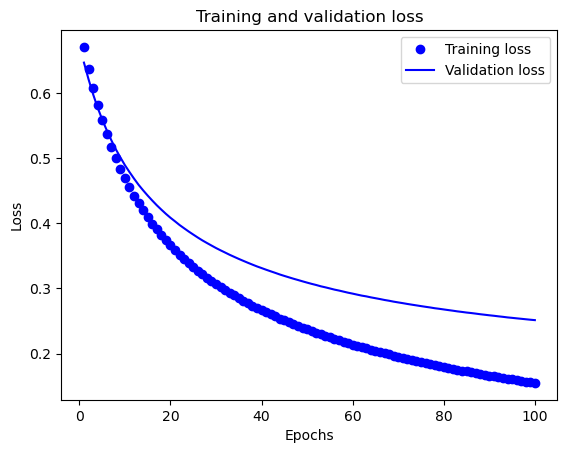

In [79]:
import matplotlib.pyplot as plt  

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

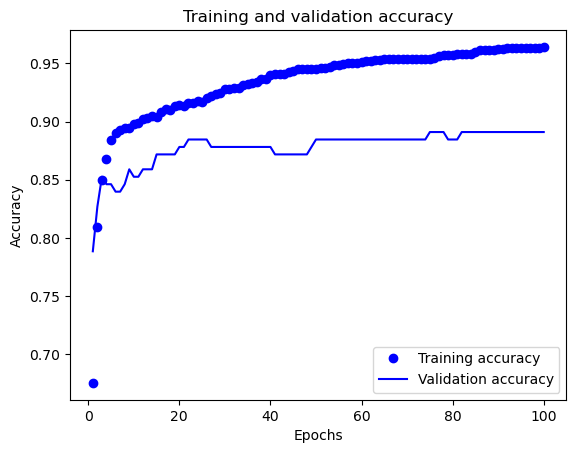

In [80]:
plt.clf()

import matplotlib.pyplot as plt  

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [81]:
# 35epochs가 최적
history2 = model.fit(x_train.A, y_train, epochs= 35, validation_split=0.1)


Epoch 1/35
44/44 [==============================] - 0s 3ms/step - loss: 0.1539 - accuracy: 0.9649 - val_loss: 0.2507 - val_accuracy: 0.8910
Epoch 2/35
44/44 [==============================] - 0s 2ms/step - loss: 0.1528 - accuracy: 0.9649 - val_loss: 0.2500 - val_accuracy: 0.8910
Epoch 3/35
44/44 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9649 - val_loss: 0.2493 - val_accuracy: 0.8910
Epoch 4/35
44/44 [==============================] - 0s 2ms/step - loss: 0.1508 - accuracy: 0.9649 - val_loss: 0.2486 - val_accuracy: 0.8910
Epoch 5/35
44/44 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9649 - val_loss: 0.2480 - val_accuracy: 0.8910
Epoch 6/35
44/44 [==============================] - 0s 2ms/step - loss: 0.1489 - accuracy: 0.9657 - val_loss: 0.2473 - val_accuracy: 0.8910
Epoch 7/35
44/44 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9649 - val_loss: 0.2468 - val_accuracy: 0.8910
Epoch 8/35
44/44 [==

In [83]:
# 최고 검증 정확도 : 89%임.
max(history2.history['val_accuracy'])

0.8910256624221802